In [101]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from sklearn.preprocessing import MinMaxScaler
from boruta import BorutaPy

import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
#---------------------------------------------------------------------
import numpy as np
import pandas as pd
import math
from apyori import apriori

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.cluster import KMeans 
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [102]:
df=pd.read_csv('Laundry_Data.csv')

# Data Cleaning


In [103]:
#df.info()
df.shape

(807, 20)

In [108]:
def fill_null_val(df):
    return df.fillna('Unknown')

def change_to_date(df):
    date=pd.to_datetime(df['Date'], infer_datetime_format=True)
    return df.assign(Date=date)

def change_to_time(df):
    time=pd.to_datetime(df['Time'], infer_datetime_format=True)
    time=pd.DatetimeIndex(time).time
    return df.assign(Time=time)

def get_day_col(df):
    dayCol=pd.DatetimeIndex(df['Date']).day
    return df.assign(Day=dayCol)

def get_month_col(df):
    monthCol=pd.DatetimeIndex(df['Date']).month
    return df.assign(Month=monthCol)

def get_month_col(df):
    monthCol=pd.DatetimeIndex(df['Date']).month
    return df.assign(Month=monthCol)

def get_time_of_day(df):
    timeOfDay=pd.cut(pd.DatetimeIndex(df['Time']).hour, bins=[-1,4,11,15,19,23], labels=["Midnight","Morning", "Afternoon", "Evening","Night"])
    return df.assign(Time_Of_Day=timeOfDay)

def fill_age(df):
    age=df['Age_Range'].fillna(round(df['Age_Range'].mean()))
    age=age.astype('int64') 
    return df.assign(Age_Range=age)

def fill_withKids_yes(df):
    with_kids = np.where(df["Kids_Category"]=='no_kids',df['With_Kids'],'yes')
    return df.assign(With_Kids=with_kids)

def drop_no(df):
    return df.drop('No',axis=1)

def fill_withKids_no(df):
    with_kids = np.where(df["Kids_Category"]!='no_kids',df['With_Kids'],'no')
    return df.assign(With_Kids=with_kids)

def W6_big(df):
    washer = np.where(df["Washer_No"]!=6,df['Basket_Size'],'big')
    return df.assign(Basket_Size=washer)

def bin_age(df):
    age_group= pd.cut(x=df['Age_Range'], bins=[20, 30, 40, 50,60])
    return df.assign(Age_Group=age_group)




def mark_washer(df):
    washer = df['Washer_No'].apply(lambda x: "{}{}".format('W_', x))
    return df.assign(Washer_No=washer)

def mark_dryer(df):
    dryer = df['Dryer_No'].apply(lambda x: "{}{}".format('D_', x))
    return df.assign(Dryer_No=dryer)

def mark_shirt(df):
    shirt = df['shirt_type'].apply(lambda x: "{}{}".format('S_', x))
    return df.assign(shirt_type=shirt)

def mark_pants(df):
    pants = df['pants_type'].apply(lambda x: "{}{}".format('P_', x))
    return df.assign(pants_type=pants)

arm_drop=['Date','Time','Age_Range','Race','Gender','Body_Size','With_Kids','Kids_Category','Spectacles']

arm_select1=['Time_Of_Day','Basket_Size','Basket_colour','Washer_No','Dryer_No','Wash_Item']
arm_select2=['Time_Of_Day','Gender','Body_Size','Age_Group','Attire','Kids_Category','Spectacles']


cluster_select=['Time_Of_Day','Race','Gender','Age_Group','Age_Range','Body_Size','With_Kids','Kids_Category','Basket_Size']

classifier1_select=['Time_Of_Day','Race','Gender','Body_Size','With_Kids','Kids_Category','Basket_Size','Basket_colour','Attire','Shirt_Colour','shirt_type','Pants_Colour','pants_type','Wash_Item','Washer_No','Dryer_No']
def drop_arm(df):
    return df.drop(columns=arm_drop)

def select_arm1(df):
    return df[arm_select1]

def select_arm2(df):
    return df[arm_select2]


def select_cluster(df):
    return df[cluster_select]

def select_classifier1(df):
    return df[classifier1_select]

In [105]:
df.head()

,No,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles
0,1,19/10/2015,20:17:50,malay,NaN,moderate,NaN,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,3,10,no
1,2,19/10/2015,20:28:42,indian,male,thin,32.0,no,no_kids,big,green,casual,NaN,short_sleeve,blue_jeans,long,NaN,6,9,no
2,3,19/10/2015,20:58:31,malay,female,NaN,30.0,no,no_kids,big,blue,casual,red,short_sleeve,black,long,NaN,4,10,no
3,4,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,NaN,black,casual,NaN,short_sleeve,yellow,short,clothes,5,9,no
4,5,19/10/2015,21:40:28,indian,male,moderate,34.0,no,no_kids,big,blue,casual,blue,short_sleeve,white,long,clothes,3,9,no


In [9]:
# df=(df.pipe(change_to_dateTime)
#                 .pipe(get_day_col)
#                 .pipe(get_month_col)
#                 .pipe(fill_age)
#                 .pipe(fill_withKids_yes)
#                 .pipe(fill_withKids_no)
#                 .pipe(fill_null_val)
#              )

In [10]:
len(df[df.isnull().any(axis=1)])/len(df)*100


67.53407682775713

In [11]:
df.isnull().sum()

No                0
Date              0
Time              0
Race             55
Gender           91
Body_Size        98
Age_Range        51
With_Kids        82
Kids_Category    30
Basket_Size      55
Basket_colour    90
Attire           31
Shirt_Colour     87
shirt_type       37
Pants_Colour      5
pants_type       95
Wash_Item        89
Washer_No         0
Dryer_No          0
Spectacles        0
dtype: int64

In [12]:
print('Race\n',df['Race'].value_counts())
print('Gender\n',df['Gender'].value_counts())
print('Body_Size\n',df['Body_Size'].value_counts())
print('With_Kids\n',df['With_Kids'].value_counts())
print('Kids_Category\n',df['Kids_Category'].value_counts())



Race
 indian        227
malay         222
chinese       221
foreigner      82
Name: Race, dtype: int64
Gender
 female    361
male      355
Name: Gender, dtype: int64
Body_Size
 fat         247
moderate    237
thin        225
Name: Body_Size, dtype: int64
With_Kids
 no     561
yes    164
Name: With_Kids, dtype: int64
Kids_Category
 no_kids     603
young        90
toddler      47
baby         36
toddler       1
Name: Kids_Category, dtype: int64


In [13]:
df.describe()

,No,Age_Range,Washer_No,Dryer_No
count,807.000000,756.000000,807.000000,807.000000
mean,404.000000,42.043651,4.465923,8.418835
std,233.105126,8.016007,1.152628,1.142694
min,1.000000,28.000000,3.000000,7.000000
25%,202.500000,35.000000,3.000000,7.000000
50%,404.000000,42.000000,4.000000,8.000000
75%,605.500000,49.000000,6.000000,9.000000
max,807.000000,55.000000,6.000000,10.000000


In [14]:
df_oneHot = pd.get_dummies(df, prefix='BC', columns=['Basket_colour'])
df_oneHot1 = pd.get_dummies(df_oneHot, prefix='Gen', columns=['Gender'])
df_oneHot2 = pd.get_dummies(df_oneHot1, prefix='Att', columns=['Attire'])
df_oneHot3 = pd.get_dummies(df_oneHot2, prefix='Wash', columns=['Washer_No'])
df_oneHot4 = pd.get_dummies(df_oneHot3, prefix='Dry', columns=['Dryer_No'])

#df_oneHot
df_oneHot4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 39 columns):
No                 807 non-null int64
Date               807 non-null object
Time               807 non-null object
Race               752 non-null object
Body_Size          709 non-null object
Age_Range          756 non-null float64
With_Kids          725 non-null object
Kids_Category      777 non-null object
Basket_Size        752 non-null object
Shirt_Colour       720 non-null object
shirt_type         770 non-null object
Pants_Colour       802 non-null object
pants_type         712 non-null object
Wash_Item          718 non-null object
Spectacles         807 non-null object
BC_black           807 non-null uint8
BC_blue            807 non-null uint8
BC_brown           807 non-null uint8
BC_green           807 non-null uint8
BC_grey            807 non-null uint8
BC_orange          807 non-null uint8
BC_pink            807 non-null uint8
BC_purple          807 non-null uint8
BC_red

In [15]:
df1=df_oneHot4.drop(['No'], axis = 1) 

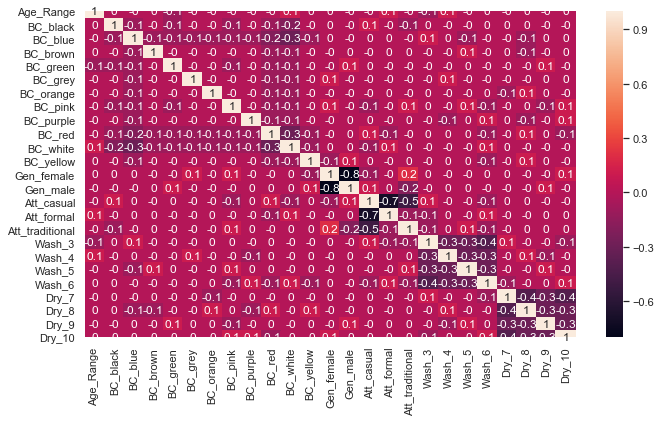

In [16]:
sns.set(rc={'figure.figsize':(11,6)})
#correlation matrix
correlation_matrix = df1.iloc[:,:].corr().round(1)

sns.heatmap(data=correlation_matrix, annot=True)


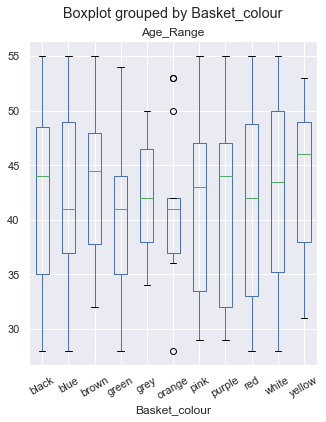

In [17]:
df.boxplot('Age_Range','Basket_colour',rot = 30,figsize=(5,6))

In [18]:
df.head(20)

,No,Date,Time,Race,Gender,Body_Size,Age_Range,With_Kids,Kids_Category,Basket_Size,Basket_colour,Attire,Shirt_Colour,shirt_type,Pants_Colour,pants_type,Wash_Item,Washer_No,Dryer_No,Spectacles
0,1,19/10/2015,20:17:50,malay,NaN,moderate,NaN,yes,young,big,red,casual,blue,short_sleeve,black,short,clothes,3,10,no
1,2,19/10/2015,20:28:42,indian,male,thin,32.0,no,no_kids,big,green,casual,NaN,short_sleeve,blue_jeans,long,NaN,6,9,no
2,3,19/10/2015,20:58:31,malay,female,NaN,30.0,no,no_kids,big,blue,casual,red,short_sleeve,black,long,NaN,4,10,no
3,4,19/10/2015,21:31:28,indian,male,thin,51.0,no,no_kids,NaN,black,casual,NaN,short_sleeve,yellow,short,clothes,5,9,no
4,5,19/10/2015,21:40:28,indian,male,moderate,34.0,no,no_kids,big,blue,casual,blue,short_sleeve,white,long,clothes,3,9,no
5,6,19/10/2015,23:45:38,NaN,male,fat,50.0,no,no_kids,small,white,casual,brown,NaN,blue_jeans,long,clothes,4,8,no
6,7,19/10/2015,23:53:38,NaN,female,fat,45.0,NaN,no_kids,big,pink,traditional,blue,NaN,black,long,clothes,5,10,no
7,8,20/10/2015,0:24:01,indian,male,thin,49.0,no,NaN,big,blue,casual,NaN,short_sleeve,brown,long,clothes,3,9,no
8,9,20/10/2015,0:45:19,indian,male,thin,30.0,no,no_kids,small,purple,casual,white,short_sleeve,black,short,clothes,6,10,no
9,10,20/10/2015,1:17:50,chinese,male,moderate,33.0,no,no_kids,small,pink,casual,white,short_sleeve,blue_jeans,short,NaN,5,7,no


# Boruta

In [109]:
cleaned=(df.pipe(change_to_date)
        .pipe(fill_age)
        .pipe(fill_withKids_yes)
        .pipe(fill_withKids_no)
        .pipe(fill_null_val)
        .pipe(mark_washer)
        .pipe(mark_dryer)
        .pipe(get_month_col)
        .pipe(get_time_of_day)
        .pipe(bin_age)
        .pipe(select_classifier1)
         
    )

In [110]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [155]:
b_cleaned=cleaned.apply(LabelEncoder().fit_transform)

y = b_cleaned.Basket_Size
X = b_cleaned.drop("Basket_Size", 1)
colnames = X.columns

In [156]:
rf = RandomForestClassifier(n_jobs=-1,class_weight="balanced",max_depth=5)
feat_selector = BorutaPy(rf, n_estimators="auto",random_state =1)

feat_selector.fit(X.values,y.values.ravel())

boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score",ascending=False)

In [157]:
# your codes here...
print('---------Top 10----------')
display(boruta_score.head(10))

# your codes here...
print('---------Bottom 10----------')
boruta_score.tail(10)

---------Top 10----------


,Features,Score
1,Race,1.00
6,Basket_colour,1.00
10,Pants_Colour,1.00
8,Shirt_Colour,0.92
7,Attire,0.83
13,Washer_No,0.75
0,Time_Of_Day,0.67
14,Dryer_No,0.58
3,Body_Size,0.50
12,Wash_Item,0.42


---------Bottom 10----------


,Features,Score
13,Washer_No,0.75
0,Time_Of_Day,0.67
14,Dryer_No,0.58
3,Body_Size,0.50
12,Wash_Item,0.42
5,Kids_Category,0.33
2,Gender,0.25
11,pants_type,0.17
9,shirt_type,0.08
4,With_Kids,0.00


In [158]:
X=b_cleaned[['Race','Basket_colour','Pants_Colour','Shirt_Colour','Attire','Washer_No','Time_Of_Day','Dryer_No','Body_Size','Wash_Item']]
y=cleaned['Basket_Size']

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [160]:
clf = SVC(kernel='linear',gamma='auto')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [161]:
confusion_majority=confusion_matrix(y_test, y_pred)
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))
mcm=multilabel_confusion_matrix(y_test, y_pred,labels=["big", "small", "Unknown"])
print(mcm)


Accuracy on test set: 0.852
[[[  0  24]
  [  0 138]]

 [[150   0]
  [ 12   0]]

 [[150   0]
  [ 12   0]]]


In [162]:
y_train.unique()

array(['big', 'small', 'Unknown'], dtype=object)

In [163]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score
print("Precision= {:.2f}".format(precision_score(y_test,y_pred, average='micro')))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average='micro')))

Precision= 0.85
Recall= 0.85


In [201]:
n_cleaned=cleaned.apply(LabelEncoder().fit_transform)

y = n_cleaned.With_Kids
X = n_cleaned.drop("With_Kids", 1)
colnames = X.columns

In [202]:
rf = RandomForestClassifier(n_jobs=-1,class_weight="balanced",max_depth=5)
feat_selector = BorutaPy(rf, n_estimators="auto",random_state =1)

feat_selector.fit(X.values,y.values.ravel())

boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score",ascending=False)

In [203]:
# your codes here...
print('---------Top 10----------')
display(boruta_score.head(10))

# your codes here...
print('---------Bottom 10----------')
boruta_score.tail(10)


---------Top 10----------


,Features,Score
2,Gender,1.0
4,Kids_Category,1.0
8,Shirt_Colour,1.0
10,Pants_Colour,1.0
12,Wash_Item,1.0
1,Race,0.9
6,Basket_colour,0.8
0,Time_Of_Day,0.7
7,Attire,0.6
3,Body_Size,0.5


---------Bottom 10----------


,Features,Score
1,Race,0.9
6,Basket_colour,0.8
0,Time_Of_Day,0.7
7,Attire,0.6
3,Body_Size,0.5
11,pants_type,0.4
13,Washer_No,0.3
9,shirt_type,0.2
14,Dryer_No,0.1
5,Basket_Size,0.0


In [204]:
X=b_cleaned[['Race','Basket_Size','Basket_colour','Pants_Colour','Attire','Shirt_Colour','Washer_No','Time_Of_Day','Dryer_No','Body_Size','Wash_Item']]
y=cleaned['With_Kids']

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [206]:
rf.fit(X, y)
y_pred = rf.predict(X_test)
rf.score(X_test, y_test)
confusion_majority=confusion_matrix(y_test, y_pred)

In [207]:
confusion_majority=confusion_matrix(y_test, y_pred)
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))
mcm1=multilabel_confusion_matrix(y_test, y_pred,labels=["yes", "no", "NaN"])
print(mcm1)

Accuracy on test set: 0.821
[[[107  14]
  [ 15  26]]

 [[ 26  15]
  [ 14 107]]

 [[162   0]
  [  0   0]]]


In [208]:
y_train.unique()

array(['no', 'yes'], dtype=object)

In [209]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score
print("Precision= {:.2f}".format(precision_score(y_test,y_pred, average='micro')))
print('Recall= {:.2f}'. format(recall_score(y_test, y_pred, average='micro')))

Precision= 0.82
Recall= 0.82
